<a href="https://colab.research.google.com/github/fabiodemo/Tensorflow-Developer-Certificate/blob/main/Neural%20Network%20Classification/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook, we're going to learn how to write Neural Networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
- Binary classification;
- Multiclass classification;
- Multilabel classification.

## Creating data to view and fit

In [23]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [24]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [25]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now, let's visualize it!

In [26]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


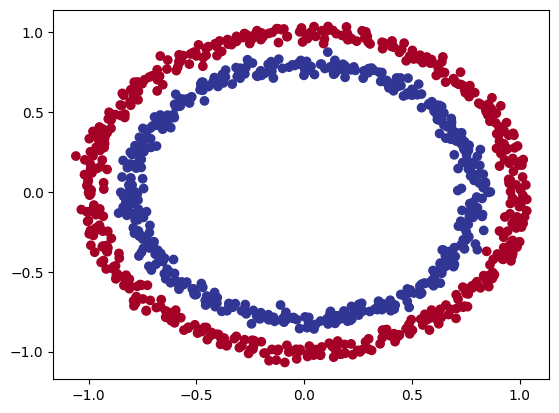

In [27]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [28]:
X.shape, y.shape

((1000, 2), (1000,))

In [29]:
# Check how many samples we're working
len(X), len(y)

(1000, 1000)

In [30]:
# View the first example of features and labels
X[0], y[0]
X[25], y[25]

(array([-0.93699411,  0.19944235]), 0)

## Steps in modelling
The steps in moddeling with TensorFlow are tipically:
1. Create a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model


In [31]:
import tensorflow as tf

In [32]:
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.0534 - accuracy: 0.4890
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.4258 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0887 - accuracy: 0.5200
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 3.7313 - accuracy: 0.5130
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 2.1912 - accuracy: 0.5180


In [33]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Trying to improve the model by training it for longer
model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X,y)
# This approach is wrong, since we're evaluating the same trained data. We should create a training dataset
# But we're working in a "toy problem", so it's okay in this case

32/32 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy, it's performing as if it's guessing.

So let's add an extra layer

In [35]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 2.0831 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7672 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7322 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7176 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7107 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7055 - accuracy: 0.4970
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7034 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7015 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5040
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6985 - accuracy: 0.4920
Epoch 11/

In [36]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933049559593201, 0.5]

In [37]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Possible steps to improve the model:
1. Create a model - we might to add more layers or increase the number of hidden units within a layer;
2. Compiling a model - We might to choose a different a different optimization function (such as Adam instead of SGD);
3. Fitting a model - Perhaps we might fit our model for more epochs (leaving it training longer);

In [38]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), # Changed to Adam
              metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 2ms/step - loss: 4.5433 - accuracy: 0.4810
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 4.5047 - accuracy: 0.4760
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.4945 - accuracy: 0.4720
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 4.4866 - accuracy: 0.4730
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 4.4791 - accuracy: 0.4730
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 4.4532 - accuracy: 0.4680
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 4.4020 - accuracy: 0.4700
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 4.3125 - accuracy: 0.4760
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 4.2781 - accuracy: 0.4740
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 4.2570 - accuracy: 0.4740


In [39]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neruons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_4.fit(X, y, epochs=10, verbose=0)

In [40]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5040


[0.6936432123184204, 0.5040000081062317]

In [41]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               300       
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


To visualize our model's predictions, let's create a function `plot_decision_boundary()`. This function will:

* Take in a trained model, features (X) and label (y);
* Create a meshgrid of the different X values;
* Make predictions across the meshgrid;
* Plot the predicitons as well as a line between zones (where each unique class falls).

In [43]:
import numpy as np

In [42]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [44]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [47]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. madewithml
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # If so, we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classification


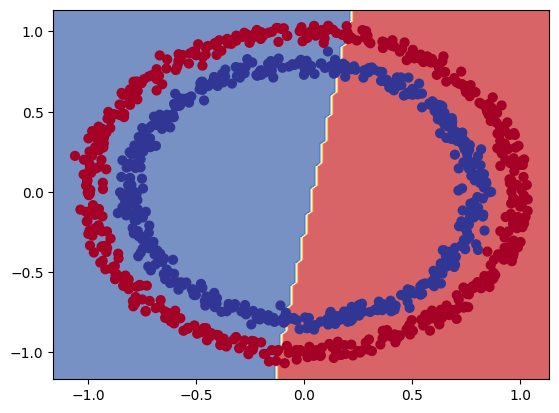

In [52]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)